# Support Vector Machine (SVM)

## Business Understanding 

# Data Understanding

# Data Preperation 

# Modelling 

# Evaluation 

# Deployment 

# Using SVM On Dataset 
I will be using a cat and dog images dataset for SVM. I will be using Jake VanderPlas's notebook and making changes to it to fit with the dataset Im using

Standard imports:

## Motivating Support Vector Machines

In [31]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
# plt.style.use('seaborn-whitegrid')
from scipy import stats

# Try to import seaborn as a style
try:
  import seaborn as sns
  sns.set_style('whitegrid')
except ImportError:
  # If seaborn is not installed, use default matplotlib style
  plt.style.use('seaborn-whitegrid')

In [32]:
import os
import pandas as pd

# Specify the appropriate encoding parameter
df = pd.read_csv("cat_dog.csv", encoding='latin1')

# Display the data
print(df)

               image  labels
0      dog.11289.jpg       1
1      cat.10836.jpg       0
2       cat.7970.jpg       0
3       cat.2212.jpg       0
4       dog.2653.jpg       1
...              ...     ...
24995  dog.12201.jpg       1
24996   dog.2893.jpg       1
24997  cat.12267.jpg       0
24998   dog.4380.jpg       1
24999   cat.7962.jpg       0

[25000 rows x 2 columns]


Since the cat_dog folder had a lot of images, I had to reduce the images down to 500 images of dogs and 500 images of cats each as the original folder was too big for Github. I created a new folder called cat_dog_set and placed 1000 images in here. As I can not upload the cat_dog folder I will link it in the CRISP-DM section above. 

In [51]:
import os
import shutil
import random

# Define the source and destination folders
source_folder = 'cat_dog'
destination_folder = 'cat_dog_set'

# Create the destination folder if it doesn't exist
os.makedirs(destination_folder, exist_ok=True)

# List the files in the source folder
file_list = os.listdir(source_folder)

# Shuffle the file list
random.shuffle(file_list)

# Counters for cats and dogs
cat_count = 0
dog_count = 0

# Loop through the files in the source folder
for file in file_list:
    # Check if the file is an image
    if file.endswith('.jpg') or file.endswith('.png'):
        # Check if the file contains 'cat' or 'dog'
        if 'cat' in file and cat_count < 1000:
            # Copy the file to the destination folder
            shutil.copy(os.path.join(source_folder, file), os.path.join(destination_folder, file))
            cat_count += 1
        elif 'dog' in file and dog_count < 1000:
            # Copy the file to the destination folder
            shutil.copy(os.path.join(source_folder, file), os.path.join(destination_folder, file))
            dog_count += 1

    # Check if we have reached the desired number of cats and dogs
    if cat_count >= 1000 and dog_count >= 1000:
        break

print(f'Copied {cat_count} cat images and {dog_count} dog images to {destination_folder}')


Copied 1000 cat images and 1000 dog images to cat_dog_set


In [52]:
import os

# Define the source folder
source_folder = 'cat_dog_set'

# List the items in the source folder
items = os.listdir(source_folder)

# Count the number of items
num_items = len(items)

# Print the number of items
print(f'There are {num_items} items in the {source_folder} folder.')


There are 5444 items in the cat_dog_set folder.


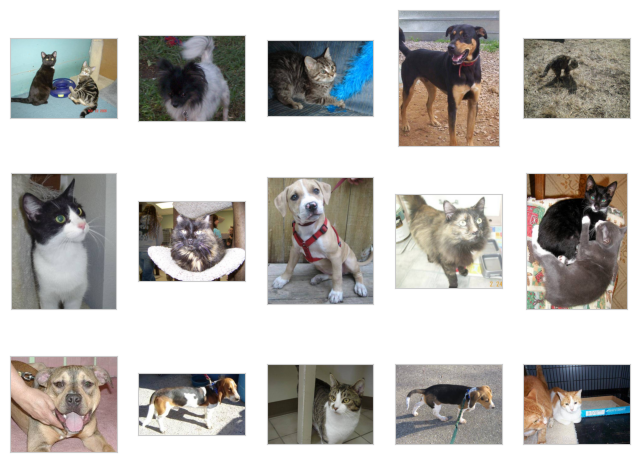

Accuracy: 0.630418809698751


In [53]:
import os
import shutil
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
import numpy as np
import cv2



# Display a random subset of the copied images
fig, ax = plt.subplots(3, 5, figsize=(8, 6))
for i, axi in enumerate(ax.flat):
    # Select a random image from the destination folder
    random_image = random.choice(os.listdir(destination_folder))
    
    # Load and display the image
    img = mpimg.imread(os.path.join(destination_folder, random_image))
    axi.imshow(img)
    
    # Remove axis ticks and labels
    axi.set(xticks=[], yticks=[])
    
plt.show()

# Define the model
pca = PCA(n_components=150, whiten=True, svd_solver='randomized', random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

# Load the images and labels
images = []
labels = []
for file in os.listdir(destination_folder):
    # Load the image
    img = mpimg.imread(os.path.join(destination_folder, file))
    
    # Resize the image to the desired dimensions
    width, height = 150, 150
    resized_img = cv2.resize(img, (width, height))
    
    # Append the resized image data to the images list
    images.append(resized_img)
    
    # Append the label (1 for cat, 0 for dog) to the labels list
    if 'cat' in file:
        labels.append(1)
    else:
        labels.append(0)

# Convert the lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

# Flatten the images
X_flat = images.reshape(images.shape[0], -1)

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_flat, labels, test_size=0.25, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


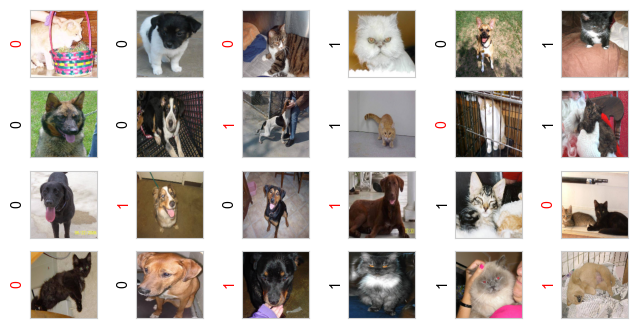

In [54]:
# Display the first 10 test images and their predicted labels (1 for cat, 0 for dog)
fig, ax = plt.subplots(4, 6, figsize=(8, 4))
for i, axi in enumerate(ax.flat):
    axi.imshow(X_test[i].reshape(150, 150, 3))
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(y_pred[i], color='black' if y_pred[i] == y_test[i] else 'red')



              precision    recall  f1-score   support

           0       0.63      0.59      0.61       660
           1       0.63      0.67      0.65       701

    accuracy                           0.63      1361
   macro avg       0.63      0.63      0.63      1361
weighted avg       0.63      0.63      0.63      1361



Text(113.9222222222222, 0.5, 'predicted label')

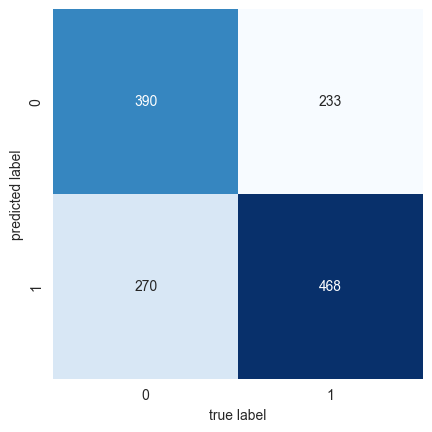

In [55]:

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

# Display the confusion matrix
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, cmap='Blues')
plt.xlabel('true label')
plt.ylabel('predicted label')
